<h1>Este notebook tem como objetivo auxiliar no meu aprendizado através da utilização de pandas para um exemplo bastante simples</h1>

<p>Importando dados: <a href="https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/">Link</a></p>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)


In [5]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [6]:
df

[                             Bank Name               City State   Cert  \
 0                    Almena State Bank             Almena    KS  15426   
 1           First City Bank of Florida  Fort Walton Beach    FL  16748   
 2                 The First State Bank      Barboursville    WV  14361   
 3                   Ericson State Bank            Ericson    NE  18265   
 4     City National Bank of New Jersey             Newark    NJ  21111   
 ..                                 ...                ...   ...    ...   
 558                 Superior Bank, FSB           Hinsdale    IL  32646   
 559                Malta National Bank              Malta    OH   6629   
 560    First Alliance Bank & Trust Co.         Manchester    NH  34264   
 561  National State Bank of Metropolis         Metropolis    IL   3815   
 562                   Bank of Honolulu           Honolulu    HI  21029   
 
                    Acquiring Institution       Closing Date  
 0                            Equit

In [7]:
df[0]

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


<h2>Vamos ver quais são os estados quem mais bancos faliram</h2>

In [8]:
df = df[0]['State']

In [9]:
df

0      KS
1      FL
2      WV
3      NE
4      NJ
       ..
558    IL
559    OH
560    NH
561    IL
562    HI
Name: State, Length: 563, dtype: object

<h3>Limpando possíveis linhas sem valores</h3>

In [10]:
df.dropna()

0      KS
1      FL
2      WV
3      NE
4      NJ
       ..
558    IL
559    OH
560    NH
561    IL
562    HI
Name: State, Length: 563, dtype: object

<h3>Contando as ocorrências dos estados</h3>

In [11]:
df.value_counts()

GA    93
FL    76
IL    69
CA    41
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
NV    12
KS    11
WI    11
SC    10
CO    10
PA    10
MD    10
OH     9
NJ     8
UT     8
AL     7
TN     7
NC     7
OK     7
OR     6
VA     5
NY     5
LA     4
AR     4
NE     4
PR     4
IN     3
KY     3
NM     3
WV     2
MS     2
IA     2
ID     2
CT     2
WY     1
SD     1
MA     1
HI     1
NH     1
Name: State, dtype: int64

<h3>Plotando um gráfico com o número de falências e os estados</h3>

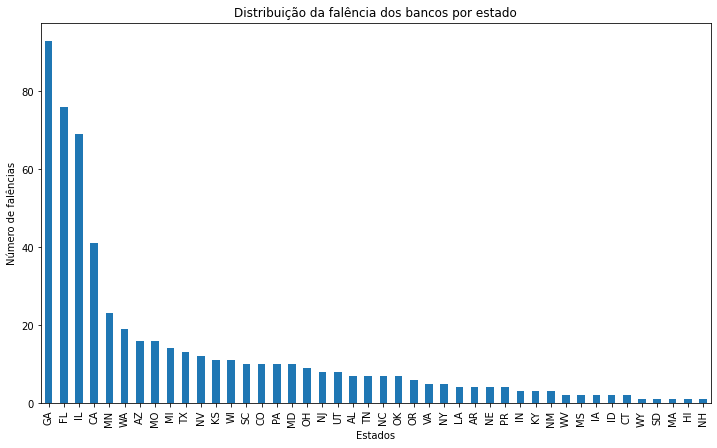

In [12]:
df.value_counts().plot.bar(figsize=(12,7))
plt.xlabel('Estados')
plt.ylabel('Número de falências')
plt.title("Distribuição da falência dos bancos por estado");

<h2>Agora eu vou ver as falências por cidade</h2>

In [13]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [14]:
df[0]['City'].value_counts()

Chicago         20
Atlanta         10
Phoenix          6
Naples           5
Miami            4
                ..
West Chester     1
Wyoming          1
Mulberry         1
Snohomish        1
Albuquerque      1
Name: City, Length: 433, dtype: int64

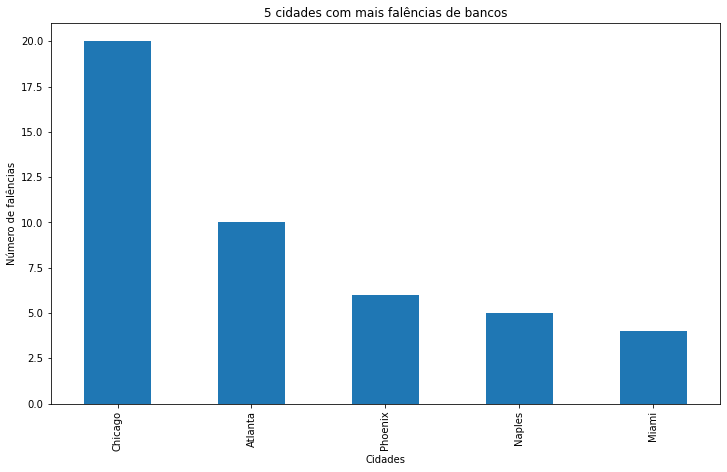

In [15]:
df[0]['City'].value_counts().head().plot.bar(figsize=(12,7))
plt.xlabel('Cidades')
plt.ylabel('Número de falências')
plt.title("5 cidades com mais falências de bancos");

<h3>Agora eu vou plotar as 15 cidades com mais falências relatadas na base de dados</h3>

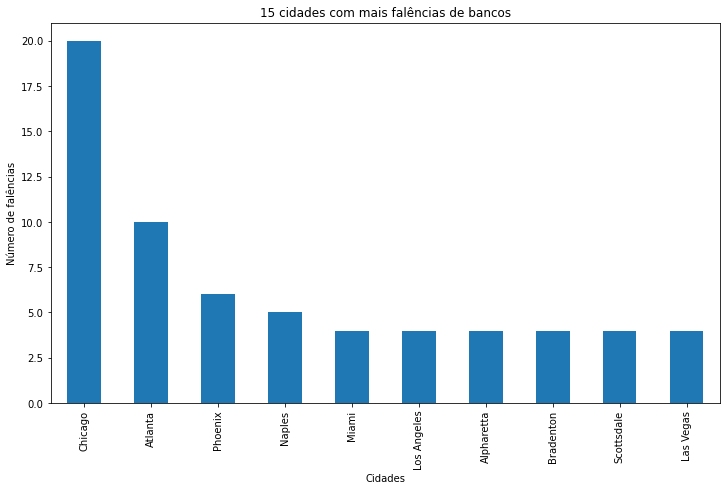

In [16]:
df[0]['City'].value_counts().head(10).plot.bar(figsize=(12,7))
plt.xlabel('Cidades')
plt.ylabel('Número de falências')
plt.title("15 cidades com mais falências de bancos");

<h3>Qual é a média de falências por estado?</h3>

In [17]:
df[0]['State'].value_counts().mean()

12.795454545454545

<h3>Quais são os estados que estão acima da média de falências por estado?</h3>

In [18]:
df2 = df[0]['State'].value_counts() > df[0]['State'].value_counts().mean()

In [19]:
df2

GA     True
FL     True
IL     True
CA     True
MN     True
WA     True
AZ     True
MO     True
MI     True
TX     True
NV    False
KS    False
WI    False
SC    False
CO    False
PA    False
MD    False
OH    False
NJ    False
UT    False
AL    False
TN    False
NC    False
OK    False
OR    False
VA    False
NY    False
LA    False
AR    False
NE    False
PR    False
IN    False
KY    False
NM    False
WV    False
MS    False
IA    False
ID    False
CT    False
WY    False
SD    False
MA    False
HI    False
NH    False
Name: State, dtype: bool

In [20]:
df

[                             Bank Name               City State   Cert  \
 0                    Almena State Bank             Almena    KS  15426   
 1           First City Bank of Florida  Fort Walton Beach    FL  16748   
 2                 The First State Bank      Barboursville    WV  14361   
 3                   Ericson State Bank            Ericson    NE  18265   
 4     City National Bank of New Jersey             Newark    NJ  21111   
 ..                                 ...                ...   ...    ...   
 558                 Superior Bank, FSB           Hinsdale    IL  32646   
 559                Malta National Bank              Malta    OH   6629   
 560    First Alliance Bank & Trust Co.         Manchester    NH  34264   
 561  National State Bank of Metropolis         Metropolis    IL   3815   
 562                   Bank of Honolulu           Honolulu    HI  21029   
 
                    Acquiring Institution       Closing Date  
 0                            Equit

In [21]:
df1 = df[0]

In [22]:
df1

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


In [23]:
array_estados = df1['State'].unique()

In [24]:
array_estados

array(['KS', 'FL', 'WV', 'NE', 'NJ', 'OH', 'KY', 'TX', 'IL', 'WI', 'LA',
       'UT', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO', 'PR', 'MN', 'CA', 'MD',
       'OK', 'SC', 'VA', 'ID', 'CT', 'AZ', 'NV', 'NC', 'MO', 'AL', 'MI',
       'IN', 'IA', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'NH', 'HI'],
      dtype=object)

In [25]:
falencias_estados = df1['State'].value_counts()

In [26]:
type(falencias_estados)

pandas.core.series.Series

In [27]:
falencias_estados

GA    93
FL    76
IL    69
CA    41
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
NV    12
KS    11
WI    11
SC    10
CO    10
PA    10
MD    10
OH     9
NJ     8
UT     8
AL     7
TN     7
NC     7
OK     7
OR     6
VA     5
NY     5
LA     4
AR     4
NE     4
PR     4
IN     3
KY     3
NM     3
WV     2
MS     2
IA     2
ID     2
CT     2
WY     1
SD     1
MA     1
HI     1
NH     1
Name: State, dtype: int64

In [28]:
df = pd.DataFrame([[93],
       [76],
       [69],
       [41],
       [23],
       [19],
       [16],
       [16],
       [14],
       [13],
       [12],
       [11],
       [11],
       [10],
       [10],
       [10],
       [10],
       [9],
       [8],
       [8],
       [7],
       [7],
       [7],
       [7],
       [6],
       [5],
       [5],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1]], index="KS FL WV NE NJ OH KY TX IL WI LA UT AR GA PA TN WA CO PR MN CA MD OK SC VA ID CT AZ NV NC MO AL MI IN IA MS NM OR NY MA SD WY NH HI".split())


In [29]:
df.add_prefix('Estados', )

,Estados0
KS,93
FL,76
WV,69
NE,41
NJ,23
OH,19
KY,16
TX,16
IL,14
WI,13


In [30]:
df.reset_index()

,index,0
0,KS,93
1,FL,76
2,WV,69
3,NE,41
4,NJ,23
5,OH,19
6,KY,16
7,TX,16
8,IL,14
9,WI,13


In [32]:
data = dict(type='choropleth',
            colorscale='viridis',
            locations=df['index'],
            marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
            z=df[0].value_counts(),
            locationmode='USA-states',
            text=df['index'],
            colorbar={'title': "X"})

layout = dict(title='CC', geo=dict(scope='usa', showlakes = True))

choromap = go.Figure(data=[data], layout=layout)

iplot(choromap, validate=False)

KeyError: 'index'